In [333]:
from geojson import Feature, Point, FeatureCollection
from shapely.geometry import Polygon, LineString, LinearRing, MultiPolygon, MultiLineString
from pandas import DataFrame as df
from geopandas.tools import overlay
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import numpy as np
%matplotlib inline
import shapely
import geojson
import subprocess
import folium
import pyproj

# conda install -c conda-forge mapclassify


from mpl_toolkits.axes_grid1 import make_axes_locatable



In [294]:
data = "data.geojson"
geodata = geojson.load(open(data))
geodata

{"crs": {"properties": {"name": "urn:ogc:def:crs:EPSG::32631"}, "type": "name"}, "features": [{"geometry": {"coordinates": [[[485086.75, 4643117.55], [485086.05, 4643117.55], [485085.35, 4643116.85], [485085.35, 4643115.45], [485084.65, 4643114.75], [485084.65, 4643114.05], [485079.75, 4643109.15], [485078.35, 4643109.15], [485077.65, 4643108.45], [485076.95, 4643108.45], [485076.95, 4643107.75], [485076.25, 4643107.05], [485075.55, 4643107.05], [485073.45, 4643105.65], [485071.35, 4643105.65], [485075.55, 4643102.85], [485078.35, 4643102.85], [485079.75, 4643101.45], [485079.75, 4643100.75], [485080.45, 4643100.05], [485080.45, 4643098.65], [485079.75, 4643097.95], [485079.05, 4643097.95], [485078.35, 4643097.25], [485077.65, 4643097.25], [485076.95, 4643096.55], [485076.25, 4643096.55], [485074.85, 4643095.15], [485074.15, 4643095.15], [485070.65, 4643091.65], [485070.65, 4643090.95], [485069.25, 4643089.55], [485069.25, 4643088.15], [485068.55, 4643087.45], [485068.55, 4643086.75], 

In [7]:
tmp_lists = []

for i in range(0, len(geodata['features'])):
    if i!=9:
        for j in range(0, len(geodata['features'][i]['geometry']["coordinates"])):
            if len(geodata['features'][i]['geometry']["coordinates"][j]) >= 3:
                tmp_lists.append(
                      {
                        'Slabel': geodata['features'][i]['properties']['Slabel'],
                        'Plabel': geodata['features'][i]['properties']['Plabel'],
                        'geometry' : Polygon(geodata['features'][i]['geometry']["coordinates"][j])
                       }
                    )
            else:
                pass
    else:
        pass


In [162]:
# tmp_lists

In [253]:

len(geodata['features'][1]['geometry']["coordinates"][63])
geodata['features'][1]['geometry']["coordinates"][63]


# len(geodata['features'][12]['geometry']["coordinates"])
# geodata['features'][12]['geometry']["coordinates"][0]


# len(geodata['features'][9]['geometry']["coordinates"])


# geodata['features'][1]['geometry']["coordinates"][55]
# geodata['features'][2]['geometry']["coordinates"]

[[483325.55, 4642069.65], [483331.15, 4642067.55]]

In [297]:
# dat= Polygon(geodata['features'][9]['geometry']["coordinates"][0])
dat= Polygon(geodata['features'][14]['geometry']["coordinates"][])
dat
# Polygon(geodata['features'][9]['geometry']["coordinates"][0])#.boundary

IndexError: list index out of range

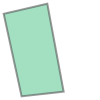

In [85]:
dat= Polygon(geodata['features'][9]['geometry']["coordinates"][78]) #.boundary

dat

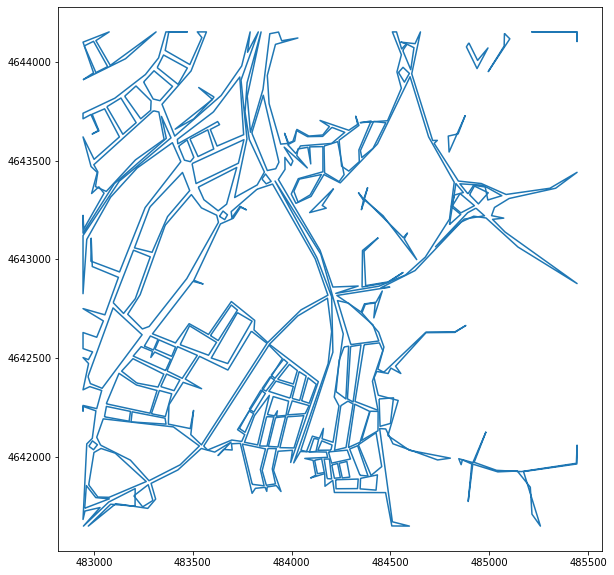

In [82]:
shp = gpd.read_file('data.shp')
roads =  shp.loc[(shp["Slabel"] == 14)]

fig, ax = plt.subplots(1, 1, figsize=(10, 10))      
# roads.plot(ax=ax)
roads= roads['geometry']
roads.boundary.plot(ax=ax)

In [164]:
gdf = gpd.GeoDataFrame(tmp_lists)

gdf.index = np.arange(1, len(gdf) + 1)

gdf = gdf.set_crs('epsg:32631')

# gdf

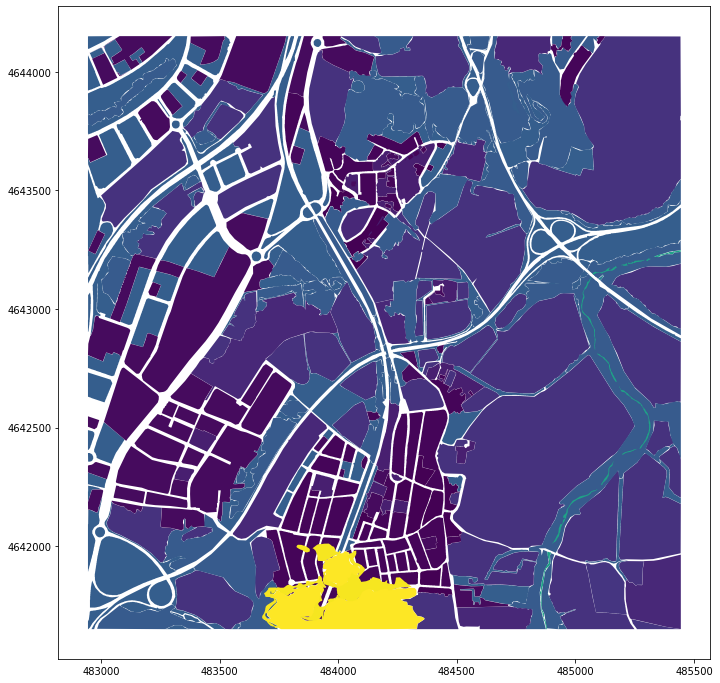

In [218]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

'''
used to plot the legend outside the map


divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
gdf.plot(column='Slabel', ax=ax, legend=True, cax=cax)
'''

gdf.plot(column='Slabel', ax=ax, )#cmap='OrRd', scheme='equal_interval')
# roads =  gdf.loc[(gdf["Slabel"] == 14)]
# roads.plot(column='Slabel', ax=ax, )

In [22]:
thick_cld =  gdf.loc[(gdf["Slabel"] == 82)]
thin_cld =  gdf.loc[(gdf["Slabel"] == 81)]
thin_cld

Slabel  Plabel                                           geometry
525      81       8  POLYGON ((483742.781 4641824.138, 483736.965 4...
526      81       8  POLYGON ((483941.429 4641936.884, 483932.481 4...
527      81       8  POLYGON ((483869.397 4641995.942, 483864.028 4...
528      81       8  POLYGON ((483994.670 4641794.609, 483992.881 4...
529      81       8  POLYGON ((484040.306 4641958.360, 484042.095 4...

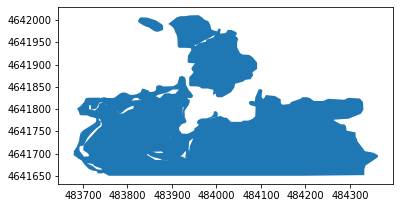

In [357]:
thick_cld.plot()

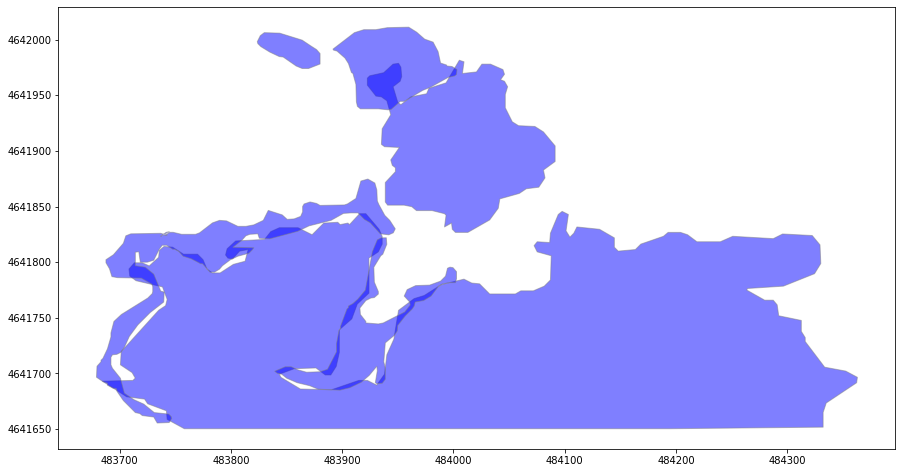

In [356]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
thick_cld.plot(ax=ax, color='blue', edgecolor='grey', alpha=0.5)
# thin_cld.plot(ax=ax, color='None', edgecolor='black', alpha=1)

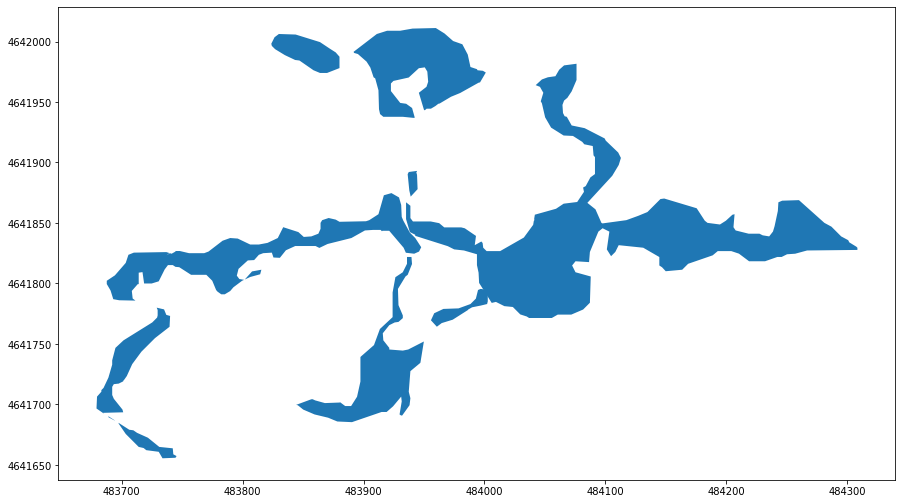

In [26]:
difference=gpd.overlay(thin_cld,thick_cld, how='difference')
# diff=gpd.overlay(thick_cld, thin_cld, how='difference')

fig, ax = plt.subplots(1, 1, figsize=(15, 20))
difference.plot(ax=ax)

In [223]:
intersection=gpd.overlay(thin_cld,thick_cld, how='intersection')

# intersection.plot()

In [224]:
union=gpd.overlay(intersection,thick_cld, how='union')


union['common_column'] = 1
dissolved = union.dissolve(by='common_column')

# dissolved
# dissolved.plot()
# union.plot()

In [225]:
new_thick_cld= dissolved.drop(['Slabel_1', 'Plabel_1', 'Slabel_2', 'Plabel_2'], axis=1)
# new_thick_cld

NameError: name 'new_thick_cld' is not defined

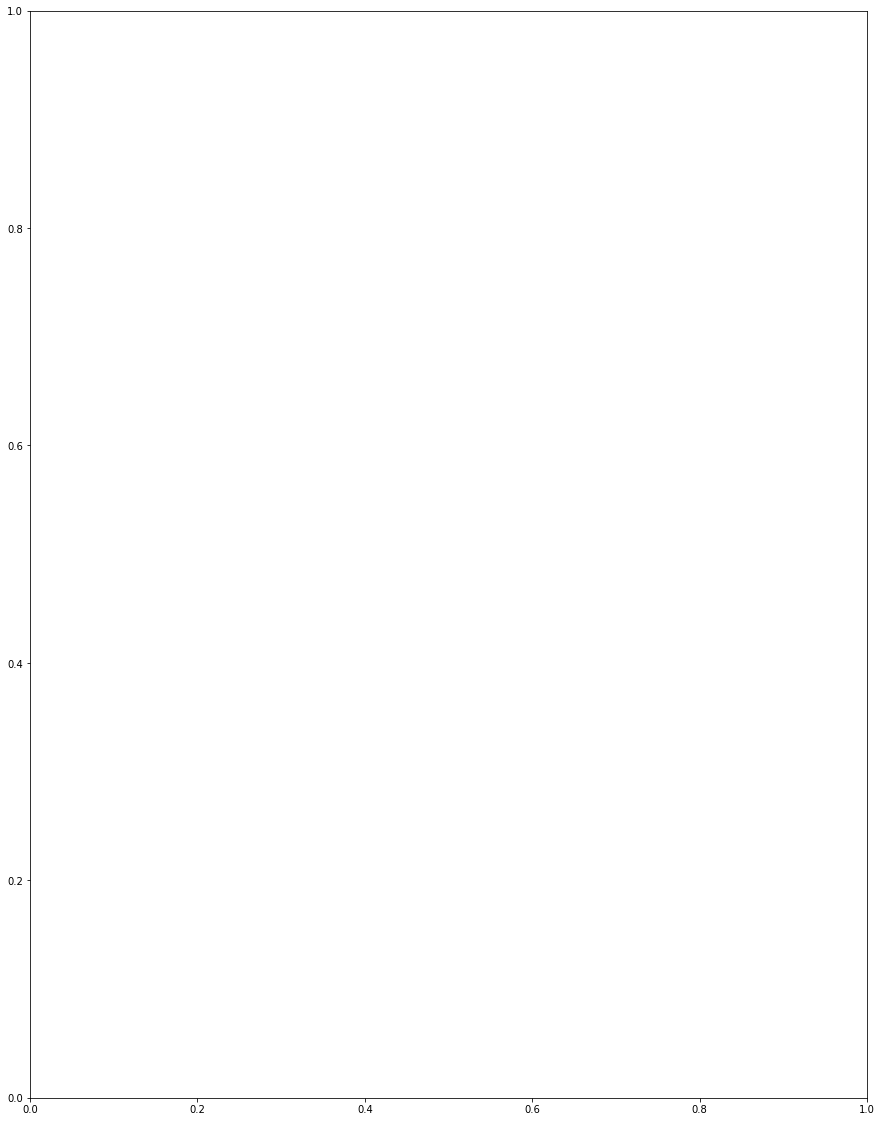

In [358]:
fig, ax = plt.subplots(1, 1, figsize=(15, 20))
# difference.plot(ax=ax, color='None', edgecolor='black', alpha=1)
new_thick_cld.plot(ax=ax, color='blue', edgecolor='none', alpha=0.5)
# thick_cld.plot(ax=ax, color='None', edgecolor='red', alpha=1)

In [227]:
# gdf.to_file('example.geojson')
# gdf.to_file('examp.shp')

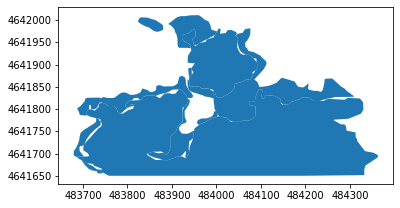

In [21]:
new_cloud = difference.append(thick_cld)
new_cloud.plot()

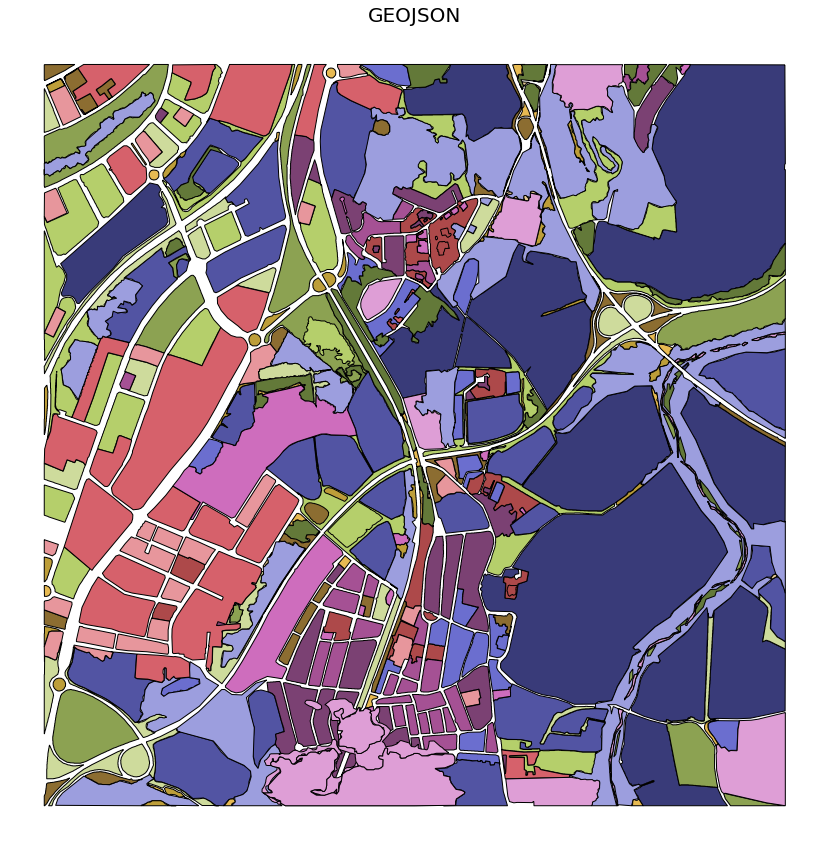

In [25]:
# creating a copy of the new data frame
gdf_copy = gdf

# droping rows that have overlays
gdf_copy = gdf_copy.drop([525,526,527,528,529]) 

# adding the new cleaned cloud to the origibal data frame
new_gdf = gdf_copy.append(new_cloud)


# new_gdf

fig, ax = plt.subplots(1, 1, figsize=(15, 15))

ax.set_title("GEOJSON", fontsize=20)
ax.set_axis_off()

new_gdf.plot(ax=ax, edgecolor='k', cmap='tab20b', alpha=1) 
# column='Slabel', color='yellow',  cmap='OrRd' scheme='equal_interval'

In [230]:
# new_full_gdf.to_file('exam.geojson', driver='GeoJSON')
# new_full_gdf.to_file('exam.shp')

In [249]:
shp = gpd.read_file('data.shp')
# shp.set_crs('epsg:32631')
# shp.to_file('data.shp')
# shp.geometry = shp.geometry.set_crs('epsg:4236', allow_override=True, inplace=True)
# shp.crs



In [232]:
# fig, ax = plt.subplots(1, 1, figsize=(15, 15))
# shp.plot(column='Slabel', ax=ax)
# shp.plot( ax=ax, color='yellow', edgecolor='green', alpha=1)


# fig, ax = plt.subplots(1, 1, figsize=(15, 20))
# shp.plot(ax=ax, edgecolor='k', cmap='tab20b', alpha=0.8)
# ax.set_axis_off()

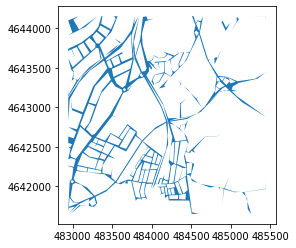

In [233]:
roads =  shp.loc[(shp["Slabel"] == 14)]
roads.plot()

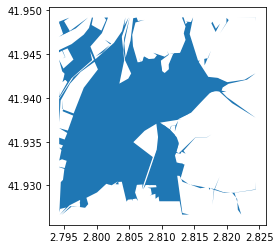

In [234]:
projshp = gpd.read_file('repdata.shp')

roads =  projshp.loc[(projshp["Slabel"] == 14)]
roads.plot()

In [235]:
projshp2= projshp.to_file('projshp.geojson', driver='GeoJSON')

In [236]:
# geoj =gpd.read_file('projshp.geojson')

In [237]:
data2 = "projshp.geojson"
geodata2 = geojson.load(open(data2))
# type(geodata2)

In [238]:
# converting projections
wgs84 = pyproj.Proj(projparams = 'epsg:4326')
InputGrid = pyproj.Proj(projparams = 'epsg:32631')


x1, y1 = 483742.781,4641824.138
lat, lon = pyproj.transform(InputGrid, wgs84, x1, y1)


def style_function(feature):
    return {
        "fillOpacity": 0.2,
        "weight": 2,
        "fillColor": "yellow",
        "line_opacity":0.5,
        "color":'black',
        
    }


m = folium.Map(location = [lat, lon], tiles = "OpenStreetMap", zoom_start = 14)
folium.features.GeoJson(
    data = geodata2, 
    name="GeoJson", 
    show=True, 
    style_function=style_function).add_to(m)


folium.LayerControl().add_to(m)
m

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  import sys


In [239]:
from geopandas.tools import overlay
# newdf = polydf.overlay(polydf2, how="intersection")

In [200]:
tmp = []

for i in range(0, len(geodata['features'])):
    if i!=9:
        for j in range(0, len(geodata['features'][i]['geometry']["coordinates"])):
            polygons = []
            if len(geodata['features'][i]['geometry']["coordinates"][j]) >= 3:
                polygons.append(Polygon(geodata['features'][i]['geometry']["coordinates"][j]))
                tmp.append(
                      {
                        'Slabel': geodata['features'][i]['properties']['Slabel'],
                        'Plabel': geodata['features'][i]['properties']['Plabel'],
                        'geometry' : MultiPolygon(polygons)
                       }
                    )
#                 print(polygons)
            else:
                pass
    else:
        pass
len(tmp_lists)

541

In [150]:


a=  geodata['features'][9]['geometry']["coordinates"][0]
b=  geodata['features'][9]['geometry']["coordinates"][1]

# geodata['features'][9]['geometry']["coordinates"][1]

c= MultiPolygon([[a, []], [b, []]])
type(c)

# a = [(0, 0), (0, 1), (1, 1), (1, 0), (0, 0)]
# b = [(1, 4), (1, 2), (2, 2), (2, 1), (1, 4)]

# multi1 = MultiPolygon([[a, []], [b, []]])
# multi1

# geodata['features'][9]['geometry']["coordinates"][2]

shapely.geometry.multipolygon.MultiPolygon

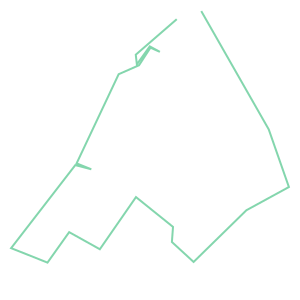

In [330]:
LineString(geodata['features'][9]['geometry']["coordinates"][2])

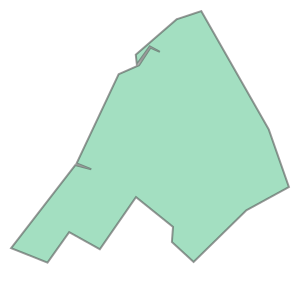

In [331]:
Polygon(geodata['features'][9]['geometry']["coordinates"][2])

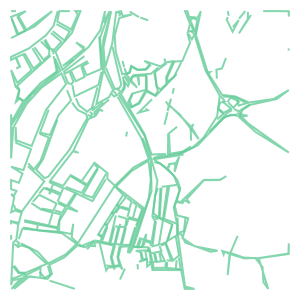

In [346]:

line=[]
for i in range(0, len(geodata['features'][9]['geometry']["coordinates"])):
    if len(geodata['features'][9]['geometry']["coordinates"][i]) >=2:
        line.append(LineString(geodata['features'][9]['geometry']["coordinates"][i]))

# da = MultiLineString([
#                     LineString(geodata['features'][9]['geometry']["coordinates"][0]), 
#                     LineString(geodata['features'][9]['geometry']["coordinates"][6]),
#                     LineString(geodata['features'][9]['geometry']["coordinates"][2]),
#                     LineString(geodata['features'][9]['geometry']["coordinates"][3]), 
#                     LineString(geodata['lenfeatures'][9]['geometry']["coordinates"][4]),
#                     LineString(geodata['features'][9]['geometry']["coordinates"][5]), 
#                     LineString(geodata['features'][9]['geometry']["coordinates"][6]),
#                     LineString(geodata['features'][9]['geometry']["coordinates"][7]),
#                     LineString(geodata['features'][9]['geometry']["coordinates"][8]),
#                     LineString(geodata['features'][9]['geometry']["coordinates"][9]),
#                      LineString(geodata['features'][9]['geometry']["coordinates"][10]),
#                      LineString(geodata['features'][9]['geometry']["coordinates"][11]),
#                      LineString(geodata['features'][9]['geometry']["coordinates"][12]),
                
#                   ])
# line

da = MultiLineString(line)
# len(geodata['features'][9]['geometry']["coordinates"][138])
da

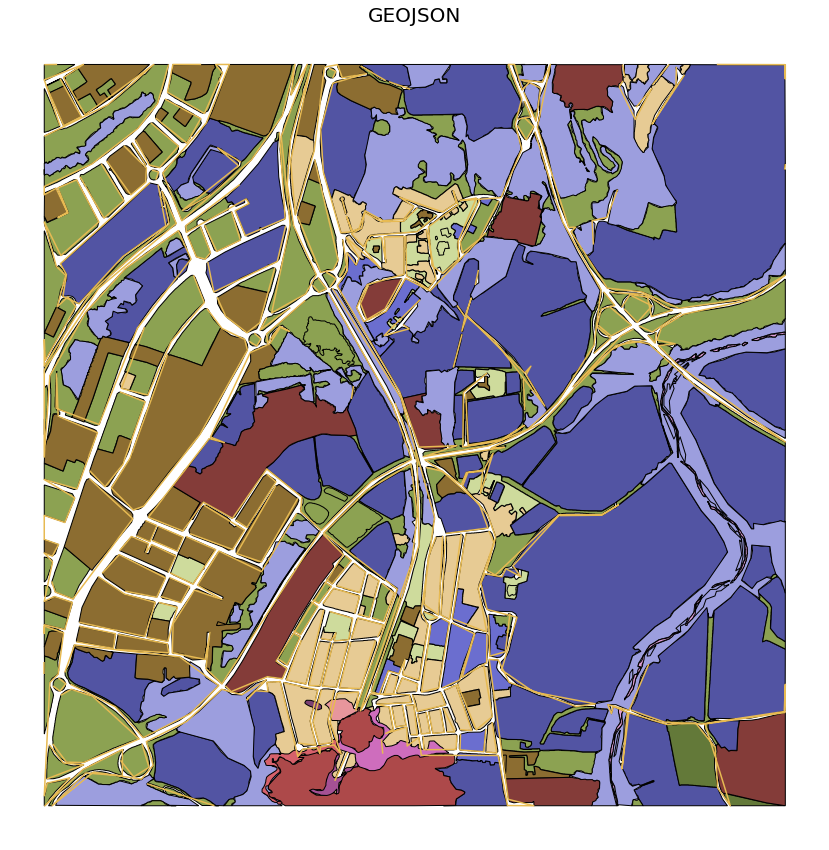

In [354]:
tmp = []
polygons = []
line=[]
for i in range(0, len(geodata['features'])):
    if i!=9:
        for j in range(0, len(geodata['features'][i]['geometry']["coordinates"])):

            if len(geodata['features'][i]['geometry']["coordinates"][j]) >= 3:
                polygons.append(Polygon(geodata['features'][i]['geometry']["coordinates"][j]))


        tmp.append( {
                'Slabel': geodata['features'][i]['properties']['Slabel'],
                'Plabel': geodata['features'][i]['properties']['Plabel'],
                'geometry' : MultiPolygon(polygons)
           })
    else:
        for k in range(0, len(geodata['features'][i]['geometry']["coordinates"])):
            if len(geodata['features'][i]['geometry']["coordinates"][k]) >=2:
                line.append(LineString(geodata['features'][i]['geometry']["coordinates"][k]))
        tmp.append({
            'Slabel': geodata['features'][i]['properties']['Slabel'],
            'Plabel': geodata['features'][i]['properties']['Plabel'],
            'geometry' :  MultiLineString(line)
            })
                
    del polygons[:]
        
# len(tmp)
# tmp

# polygons
gdf = gpd.GeoDataFrame(tmp)

# gdf.index = np.arange(1, len(gdf) + 1)

gdf = gdf.set_crs('epsg:32631')

fig, ax = plt.subplots(1, 1, figsize=(15, 15))

ax.set_title("GEOJSON", fontsize=20)
ax.set_axis_off()


gdf.plot(ax=ax, edgecolor='k', cmap='tab20b', alpha=1)
# gdf

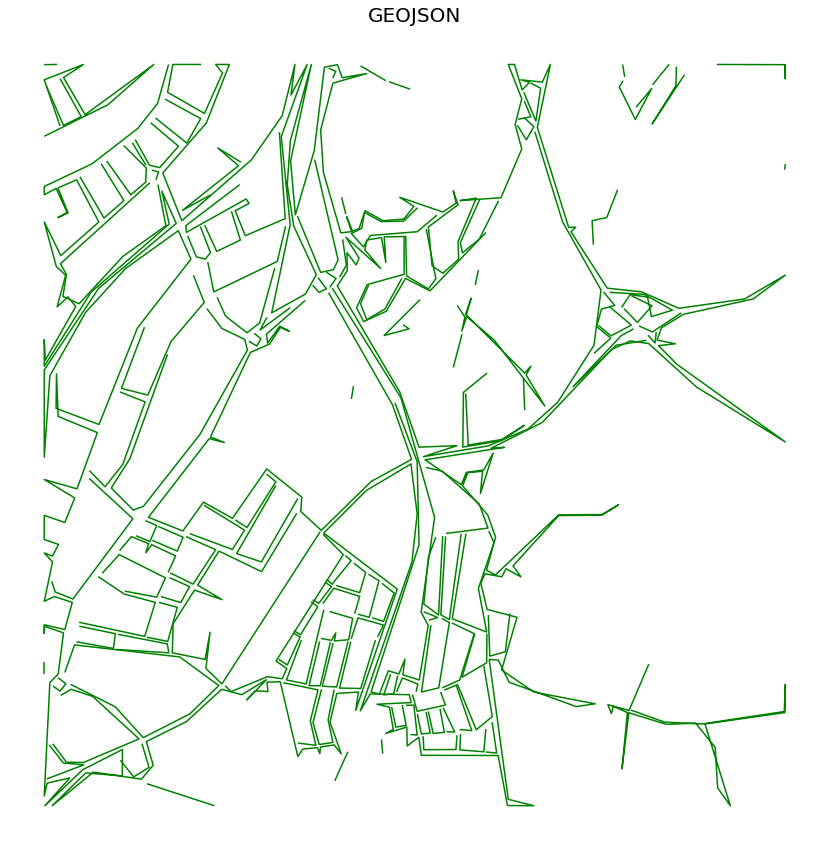

In [355]:
thi_cld =  gdf.loc[(gdf["Slabel"] == 14)]

fig, ax = plt.subplots(1, 1, figsize=(15, 15))

ax.set_title("GEOJSON", fontsize=20)
ax.set_axis_off()

thi_cld.plot(ax=ax, edgecolor='g')

In [ ]:
line=[]
for i in range(0, len(geodata['features'][9]['geometry']["coordinates"])):
    line.append(LineString(geodata['features'][9]['geometry']["coordinates"][i]))

da = MultiLineString(line)
da